In [170]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [171]:
from rlway.pyosrd import OSRD

In [172]:
OSRD.use_cases

['c1',
 'c1y2',
 'c2x2',
 'c2xx2',
 'c2y13s',
 'c2y1y2',
 'c2z2z2',
 'c3y1',
 'c3yy1yy3',
 'cvg_dvg',
 'point_switch',
 'station_capacity2',
 'straight_line']

In [173]:
sim = OSRD(use_case='station_capacity2', dir='tmp')

[12:43:29,391] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[12:43:29,431] [INFO]              [FullInfra] parsing infra
[12:43:29,510] [INFO]              [FullInfra] adaptation to kotlin
[12:43:29,552] [INFO]              [FullInfra] loading signals
[12:43:29,559] [INFO]              [FullInfra] building blocks
[12:43:29,567] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[12:43:29,584] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.10
[12:43:29,648] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.11
[12:43:29,657] [INFO]  [StandaloneSimulationCommand] All simulations completed
[12:43:29,657] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json


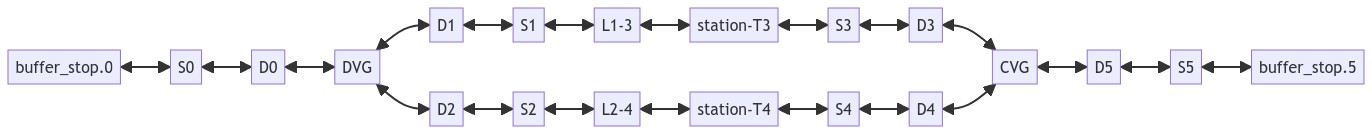

In [174]:
sim.draw_infra_points()

In [175]:
sim.trains

['train0', 'train1']

In [176]:
sim.reset_delays()
sim.add_delay('train0', time_threshold=90, delay=280.)
delayed = sim.delayed()

In [177]:
from rlway.pyosrd.agents.agent import Agent

In [178]:
from dataclasses import dataclass
from typing import List, Dict, Any


class DoNothing(Agent):

    def stops(self, osrd) -> List[Dict[str, Any]]:
        return []

@dataclass
class AddStop(Agent):
    train: int
    position: float
    duration: float

    def stops(self, osrd) -> List[Dict[str, Any]]:
        print(self.delayed)
        return [{
            'train': self.train,
            'position': self.position,
            'duration': self.duration,
        }]

In [179]:
# regulated = sim.regulate(agent=AddStop('name', 1, 2500, 5))
regulated = sim.regulate(agent=AddStop('name', 0, 2500, 10))
# regulated = sim.regulate(agent=DoNothing('nothing'))

OSRD(dir='tmp', use_case='station_capacity2', infra_json='infra.json', simulation_json='simulation.json', results_json='delayed/results.json', delays_json='delays.json')
[12:43:30,378] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[12:43:30,425] [INFO]              [FullInfra] parsing infra
[12:43:30,525] [INFO]              [FullInfra] adaptation to kotlin
[12:43:30,578] [INFO]              [FullInfra] loading signals
[12:43:30,587] [INFO]              [FullInfra] building blocks
[12:43:30,596] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/delayed/name/simulation.json
[12:43:30,621] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.10
[12:43:30,701] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.11
[12:43:30,710] [INFO]  [StandaloneSimulationCommand] All simulations completed
[12:43:30,710] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/delayed/name/results.json


In [180]:
import matplotlib.pyplot as plt
points_to_show = ['switch', 'departure', 'switch', 'arrival', 'station']
fig1 = sim.space_time_chart_plotly(0, points_to_show=points_to_show)
fig2 = delayed.space_time_chart_plotly(0, points_to_show=points_to_show)
fig3 = regulated.space_time_chart_plotly(0, points_to_show=points_to_show)

In [181]:
fig1.show()
fig2.show()
fig3.show()

In [182]:
from rlway.schedules import schedule_from_osrd

s = schedule_from_osrd(sim)
sd = schedule_from_osrd(delayed)
sr = schedule_from_osrd(regulated)

<Axes: xlabel='Time'>

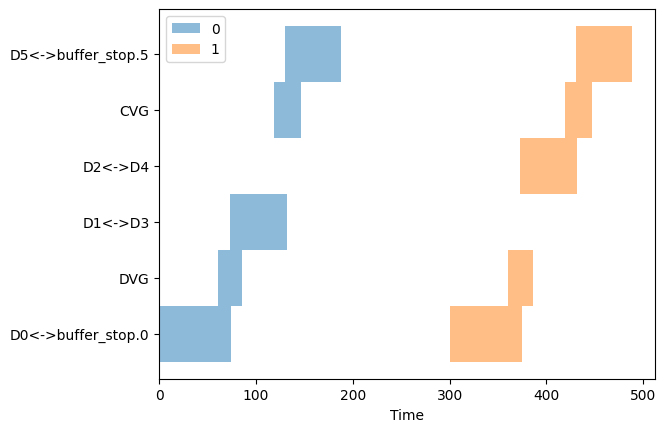

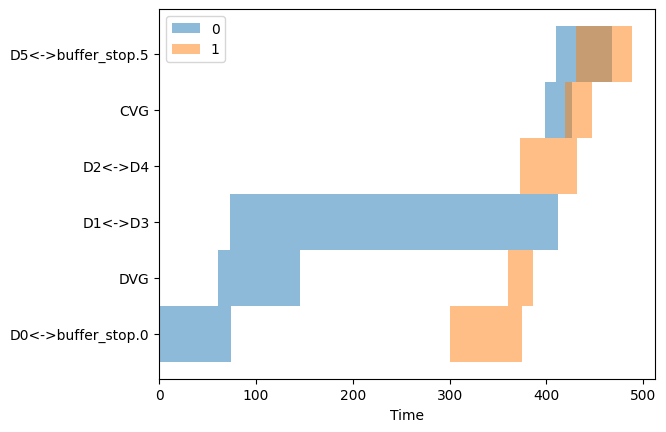

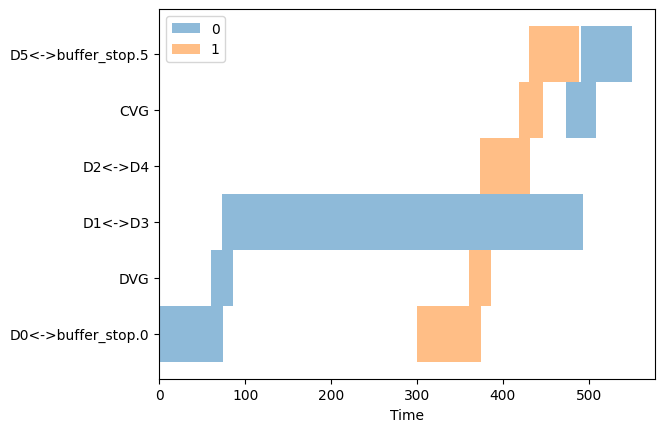

In [183]:
s.plot()
sd.plot()
sr.plot()

In [184]:
sd.draw_graph()

In [192]:
sim.regulate(myagent).space_time_chart_plotly(0)

[12:46:51,918] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[12:46:51,951] [INFO]              [FullInfra] parsing infra
[12:46:52,013] [INFO]              [FullInfra] adaptation to kotlin
[12:46:52,047] [INFO]              [FullInfra] loading signals
[12:46:52,054] [INFO]              [FullInfra] building blocks
[12:46:52,058] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/delayed/nom/simulation.json
[12:46:52,070] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.10


RuntimeError: Exception in thread "main" fr.sncf.osrd.reporting.exceptions.OSRDError: Train stop must specify exactly one of position or location
	at fr.sncf.osrd.railjson.parser.RJSStopsParser.parse(RJSStopsParser.java:24)
	at fr.sncf.osrd.railjson.parser.RJSStandaloneTrainScheduleParser.parse(RJSStandaloneTrainScheduleParser.java:75)
	at fr.sncf.osrd.standalone_sim.StandaloneSim.runFromRJS(StandaloneSim.java:141)
	at fr.sncf.osrd.cli.StandaloneSimulationCommand.run(StandaloneSimulationCommand.java:98)
	at fr.sncf.osrd.App.main(App.java:44)


In [205]:
from rlway.pyosrd.scheduler_agent import SchedulerAgent

class CpAgent(SchedulerAgent):

    @property
    def steps_extra_delays(self):
        df = self.initial_schedule.durations * 0.
        df.iloc[0][0] = 100.
        return df

In [206]:
myagent = CpAgent('nom')

In [207]:
sim.points_encountered_by_train(1)

[{'id': 'departure_train1',
  'offset': 0.0,
  'type': 'departure',
  't_base': 300.0,
  't_tail_base': 341.9564612506205},
 {'id': 'S0',
  'offset': 790.0,
  'type': 'signal',
  't_base': 359.48809903736674,
  't_tail_base': 373.8948836892308},
 {'id': 'D0',
  'offset': 810.0,
  'type': 'detector',
  't_base': 360.2971348518504,
  't_tail_base': 374.5557819086728},
 {'id': 'DVG',
  'offset': 990.0,
  'type': 'switch',
  't_base': 367.01383110325344,
  't_tail_base': 380.3203630455616},
 {'id': 'D2',
  'offset': 1170.0,
  'type': 'detector',
  't_base': 373.2339854697888,
  't_tail_base': 385.708635989715},
 {'id': 'station',
  'offset': 2780.0,
  'type': 'station',
  't_base': 417.9765231471828,
  't_tail_base': 430.64702123147396},
 {'id': 'S4',
  'offset': 2790.0,
  'type': 'signal',
  't_base': 418.25430092496055,
  't_tail_base': 430.9918488176809},
 {'id': 'D4',
  'offset': 2810.0,
  'type': 'detector',
  't_base': 418.8098564805161,
  't_tail_base': 431.72704725619747},
 {'id': 

In [208]:
sim.regulate(myagent).space_time_chart_plotly(0, points_to_show=['detector'])

0 D0<->buffer_stop.0 {'type': 'signal', 'offset': 790.0, 'id': 'D5'}
[12:53:16,178] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[12:53:16,237] [INFO]              [FullInfra] parsing infra
[12:53:16,305] [INFO]              [FullInfra] adaptation to kotlin
[12:53:16,343] [INFO]              [FullInfra] loading signals
[12:53:16,350] [INFO]              [FullInfra] building blocks
[12:53:16,359] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/delayed/nom/simulation.json
[12:53:16,375] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.10
[12:53:16,440] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.11
[12:53:16,445] [INFO]  [StandaloneSimulationCommand] All simulations completed
[12:53:16,445] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/delayed/nom/results.json


In [ ]:
sim.stop_positions[0]['D0<->buffer_stop.0']['offset']

790.0